<a href="https://colab.research.google.com/github/ummehaani0504/Capstone-Project-on-Credit-Card-Prediction/blob/main/Credit_Card_(Capstone_Project)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The dataset is about the credit card approval/rejection.It initially consists of 19 columns (features) and 1548 rows(observations).

A bank has multiple roles. Providing a credit card to an individual is one of the major tasks a bank has to go through. Banks take credit card approval decisions based on the applicant's profile- such as CIBIL Score. There are two types of risk associated with the bank’s decision.

Not approving a credit_card to an applicant having a good credit risk is a loss of business to the bank.
Approving the credit card to an applicant having a bad credit risk is also a loss of business to the bank.

Hence, banks have to be very careful while accepting or rejecting a loan application

# Section-1

**1)The proposal is important in today's world** since Banks have been focussing on data Analytics to improve their credit assessment processes. 

Accurately assessing these credit risk helps banks avoid issuing money to customers  who may not be able to pay back their debts, reducing the risk of default and potential financial losses for the bank. 

Detecting good customers is very important for any bank to retain  profitability.

# 2)It is going to impact the banking sector in a significant way,

If there are constant defaulters, this may lead huge losses to the Banks and banks would end up with huge debts.

# 3) The proposed method would certainly help the bank 

in assessing precisely what kind of customers are regular defaulters, what is their Annual Income,Type of Occupation, which would definitely help Banks to decide based on the Different Classification Models developed which is the best one to predict the right client.  

# Section-2
1)Initial hypothesis is to determine some of the  customer features such as annual income, employment_days , education, and number of family members are the major factors in credit card approval. 

2)By using various machine learning model will help us enhance the accuracy of loan/credit history of the client compared to the traditional methods by Banks.

# The different cost Functions/ Loss Functions that can be used is log loss, cross entropy loss.

# Section 3
1)We will use exploratory data analysis (EDA) to identify relationship between the dependent and independent variables and determine the strong features in the data.

 Various feature engineering techniques such as Imputation,label encoding,handling outliers and feature scaling to make the data fine tuned  for machine learning models.

 2)For the machine learning models, we will use  classification models to determine credit card approval. We will use  various models such as logistic regression, decision tree, random forest, and K-Nearest Neighbor determine which model performs best. 

We will use accuracy, precision, recall, and F1 score to evaluate the performance of each model.

# Section 4
We will use a  classification models to predict credit card approval/rejection. 
We will be to use logistic regression ,decision trees, random forest, and SVM to determine which model performs best.
To improve the accuracy of our model, we will use hyperparameter tuning, determine the outliers through binning, ensemble methods like bagging (bootstrapping & Aggregation).
We will compare the performance of each model using metrics such as accuracy, precision, recall, and F1 score. We will select the model with the best performance as our final model.
 

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as  go
import sklearn
import category_encoders as ce

# Importing required libraries

In [ ]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading the dataset
DF1= pd.read_csv('Credit_card.csv') 
df1 = DF1.copy() #creating a new copy

**UNDERSTANDING THE DATA**

In [ ]:
df1.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [ ]:
#reading the second csv file
DF2 = pd.read_csv('Credit_card_label.csv')
df2 = DF2.copy() #creating a new copy

In [ ]:
df2.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

# Loading the DATASET

In [ ]:
#merging the two csv files
df3 = pd.merge(df1,df2, on ='Ind_ID')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df3.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

# DATA Pre-processing

In [ ]:
df3['Housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [ ]:
df3.tail()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0

In [ ]:
#determining the details such as the no. of columns and rows, datatype of each column
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
#checking the number of missing values
df3.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
df3['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
df3['Annual_income'].unique()

array([ 180000. ,  315000. ,       nan,  450000. ,   90000. ,  472500. ,
        270000. ,  126000. ,  202500. ,  157500. ,  112500. ,  540000. ,
        292500. ,  135000. ,   76500. ,  215100. ,  225000. ,   67500. ,
        171000. ,  103500. ,   99000. ,  391500. ,   65250. ,   72900. ,
        360000. ,  256500. ,  675000. ,  247500. ,   85500. ,  121500. ,
        130500. ,  211500. ,   81000. ,   72000. ,  148500. ,  162000. ,
        195750. ,  585000. ,  216000. ,  306000. ,  108000. ,   63000. ,
         45000. ,  337500. ,  131400. ,  117000. ,  445500. ,  234000. ,
       1575000. ,  144000. ,   67050. ,   73350. ,  193500. ,  900000. ,
         94500. ,  198000. ,   54000. ,  166500. ,  167400. ,  153000. ,
        423000. ,  243000. ,  283500. ,  252000. ,  495000. ,  612000. ,
         36000. ,  139500. ,  133650. ,  427500. ,  261000. ,  231750. ,
         90900. ,   45900. ,  119250. ,   58500. ,  328500. ,  787500. ,
        594000. ,  119700. ,   69372. ,   37800. , 

In [ ]:
df3['Birthday_count'].unique()

array([-18772., -13557.,     nan, ..., -10229., -15292., -16601.])

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
#reconfirming the number of rows and columns in the dataset
df3.shape


(1548, 19)

In [ ]:
#checking if the rows are correctly named 
df3.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
df3['Type_Income'].isnull().sum()

0

In [ ]:
df3['Type_Occupation'].isnull().sum()

488

In [ ]:
df3.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
df3['Annual_income'].describe()

count    1.525000e+03
mean     1.913993e+05
std      1.132530e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.665000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Annual_income, dtype: float64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df3.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
#summary of continuous data
df3.describe()

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        label  
count     1548.000000  1548.000000  
mean         2.161499     0.113049  
std          0.947772     0.316755  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max         15.000000     1.000000

In [ ]:
df3.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
df3['GENDER'].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

In [ ]:
df3['Car_Owner'].value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

In [ ]:
df3['Propert_Owner'].value_counts()

Y    1010
N     538
Name: Propert_Owner, dtype: int64

In [ ]:
df3['CHILDREN'].value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

In [ ]:
df3['Annual_income'].value_counts()

135000.0     170
112500.0     144
180000.0     137
157500.0     125
225000.0     119
202500.0      98
270000.0      69
90000.0       61
315000.0      49
247500.0      38
360000.0      33
67500.0       33
450000.0      29
126000.0      27
292500.0      27
99000.0       18
103500.0      17
337500.0      14
121500.0      14
81000.0       14
144000.0      13
216000.0      12
108000.0      10
76500.0       10
193500.0      10
148500.0      10
306000.0       9
72000.0        9
117000.0       9
405000.0       9
171000.0       9
94500.0        8
189000.0       7
130500.0       7
198000.0       7
166500.0       7
162000.0       6
234000.0       5
45000.0        5
261000.0       5
85500.0        5
153000.0       5
900000.0       4
54000.0        4
211500.0       4
207000.0       4
391500.0       4
58500.0        3
585000.0       3
495000.0       3
243000.0       3
256500.0       3
540000.0       3
252000.0       3
83250.0        2
139500.0       2
612000.0       2
175500.0       2
351000.0      

In [ ]:
df3['Birthday_count'].value_counts()

-13557.0    5
-22655.0    5
-14523.0    5
-21363.0    5
-17454.0    4
-24611.0    4
-23286.0    4
-17915.0    4
-18173.0    4
-22002.0    3
-16424.0    3
-9242.0     3
-17532.0    3
-20103.0    3
-10660.0    3
-13682.0    3
-15438.0    3
-17841.0    3
-16413.0    3
-18952.0    3
-16027.0    3
-14522.0    3
-17202.0    3
-13720.0    3
-16011.0    3
-10101.0    3
-22034.0    3
-18335.0    3
-18950.0    3
-9847.0     3
-11998.0    3
-9810.0     3
-14897.0    3
-10177.0    3
-12348.0    3
-10942.0    2
-10837.0    2
-13174.0    2
-17262.0    2
-12843.0    2
-12483.0    2
-9488.0     2
-21944.0    2
-14358.0    2
-15185.0    2
-21454.0    2
-17579.0    2
-9006.0     2
-10142.0    2
-11970.0    2
-13805.0    2
-17152.0    2
-14746.0    2
-19010.0    2
-13867.0    2
-17237.0    2
-11342.0    2
-20354.0    2
-11268.0    2
-17778.0    2
-12262.0    2
-19295.0    2
-14080.0    2
-14228.0    2
-19298.0    2
-16542.0    2
-14321.0    2
-19881.0    2
-16182.0    2
-15436.0    2
-20754.0    2
-15256

In [ ]:
df3['Type_Income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [ ]:
df3['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [ ]:
df3['Marital_status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [ ]:
df3['Housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [ ]:
df3['Employed_days'].value_counts()

 365243    261
-586         6
-622         5
-460         5
-1678        5
-1649        5
-3420        5
-140         4
-217         4
-1935        4
-555         4
-3366        4
-1081        4
-923         4
-412         4
-505         4
-508         4
-3694        4
-925         4
-678         4
-727         3
-2531        3
-2796        3
-3246        3
-5639        3
-584         3
-1751        3
-1539        3
-1787        3
-1128        3
-1904        3
-1526        3
-2257        3
-657         3
-235         3
-1569        3
-502         3
-2234        3
-2057        3
-825         3
-1674        3
-1436        3
-1002        3
-900         3
-4305        3
-499         3
-1394        3
-469         3
-3476        3
-1458        3
-1682        3
-227         3
-1000        3
-2269        3
-1344        3
-1161        3
-7288        3
-2052        3
-1748        3
-962         3
-1463        3
-157         3
-2993        3
-1866        3
-3153        3
-1724        3
-1923     

In [ ]:
df3['Mobile_phone'].value_counts()

1    1548
Name: Mobile_phone, dtype: int64

In [ ]:
df3['Work_Phone'].value_counts()

0    1226
1     322
Name: Work_Phone, dtype: int64

In [ ]:
df3['Phone'].value_counts()

0    1069
1     479
Name: Phone, dtype: int64

In [ ]:
df3['EMAIL_ID'].value_counts()

0    1405
1     143
Name: EMAIL_ID, dtype: int64

In [ ]:
df3['Family_Members'].value_counts()

2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: Family_Members, dtype: int64

In [ ]:
df3['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64


**DATA CLEANING**

In [ ]:
#determining missing data
total = df3.isnull().sum().sort_values(ascending=False)
percent = (df3.isnull().sum()/df3.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data.head(25)

Total   Percent
Type_Occupation    488  0.315245
Annual_income       23  0.014858
Birthday_count      22  0.014212
GENDER               7  0.004522
Ind_ID               0  0.000000
Employed_days        0  0.000000
Family_Members       0  0.000000
EMAIL_ID             0  0.000000
Phone                0  0.000000
Work_Phone           0  0.000000
Mobile_phone         0  0.000000
Housing_type         0  0.000000
Marital_status       0  0.000000
EDUCATION            0  0.000000
Type_Income          0  0.000000
CHILDREN             0  0.000000
Propert_Owner        0  0.000000
Car_Owner            0  0.000000
label                0  0.000000

In [ ]:
df3.describe(include='all')

Ind_ID GENDER Car_Owner Propert_Owner     CHILDREN  \
count   1.548000e+03   1541      1548          1548  1548.000000   
unique           NaN      2         2             2          NaN   
top              NaN      F         N             Y          NaN   
freq             NaN    973       924          1010          NaN   
mean    5.078920e+06    NaN       NaN           NaN     0.412791   
std     4.171759e+04    NaN       NaN           NaN     0.776691   
min     5.008827e+06    NaN       NaN           NaN     0.000000   
25%     5.045070e+06    NaN       NaN           NaN     0.000000   
50%     5.078842e+06    NaN       NaN           NaN     0.000000   
75%     5.115673e+06    NaN       NaN           NaN     1.000000   
max     5.150412e+06    NaN       NaN           NaN    14.000000   

        Annual_income Type_Income                      EDUCATION  \
count    1.525000e+03        1548                           1548   
unique            NaN           4                              5   
top               NaN     Working  Secondary / secondary special   
freq              NaN         798                           1031   
mean     1.913993e+05         NaN                            NaN   
std      1.132530e+05         NaN                            NaN   
min      3.375000e+04         NaN                            NaN   
25%      1.215000e+05         NaN                            NaN   
50%      1.665000e+05         NaN                            NaN   
75%      2.250000e+05         NaN                            NaN   
max      1.575000e+06         NaN                            NaN   

       Marital_status       Housing_type  Birthday_count  Employed_days  \
count            1548               1548     1526.000000    1548.000000   
unique              5                  6             NaN            NaN   
top           Married  House / apartment             NaN            NaN   
freq             1049               1380             NaN            NaN   
mean              NaN                NaN   -16040.342071   59364.689922   
std               NaN                NaN     4229.503202  137808.062701   
min               NaN                NaN   -24946.000000  -14887.000000   
25%               NaN                NaN   -19553.000000   -3174.500000   
50%               NaN                NaN   -15661.500000   -1565.000000   
75%               NaN                NaN   -12417.000000    -431.750000   
max               NaN                NaN    -7705.000000  365243.000000   

        Mobile_phone   Work_Phone        Phone     EMAIL_ID Type_Occupation  \
count         1548.0  1548.000000  1548.000000  1548.000000            1060   
unique           NaN          NaN          NaN          NaN              18   
top              NaN          NaN          NaN          NaN        Laborers   
freq             NaN          NaN          NaN          NaN             268   
mean             1.0     0.208010     0.309432     0.092377             NaN   
std              0.0     0.406015     0.462409     0.289651             NaN   
min              1.0     0.000000     0.000000     0.000000             NaN   
25%              1.0     0.000000     0.000000     0.000000             NaN   
50%              1.0     0.000000     0.000000     0.000000             NaN   
75%              1.0     0.000000     1.000000     0.000000             NaN   
max              1.0     1.000000     1.000000     1.000000             NaN   

        Family_Members        label  
count      1548.000000  1548.000000  
unique             NaN          NaN  
top                NaN          NaN  
freq               NaN          NaN  
mean          2.161499     0.113049  
std           0.947772     0.316755  
min           1.000000     0.000000  
25%           2.000000     0.000000  
50%           2.000000     0.000000  
75%           3.000000     0.000000  
max          15.000000     1.000000

In [ ]:
df3.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [ ]:
df3['label'].describe()

count    1548.000000
mean        0.113049
std         0.316755
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: label, dtype: float64

In [ ]:
df3['Family_Members'].isnull().sum()

0

In [ ]:
phone_col = []
for col in df3.columns:
  if col.endswith("one"):
    phone_col.append(col)
len(phone_col)

3

In [ ]:
df3_phone =df3[phone_col+['label']]
df3_phone.head()

Mobile_phone  Work_Phone  Phone  label
0             1           0      0      1
1             1           1      1      1
2             1           1      1      1
3             1           1      1      1
4             1           1      1      1

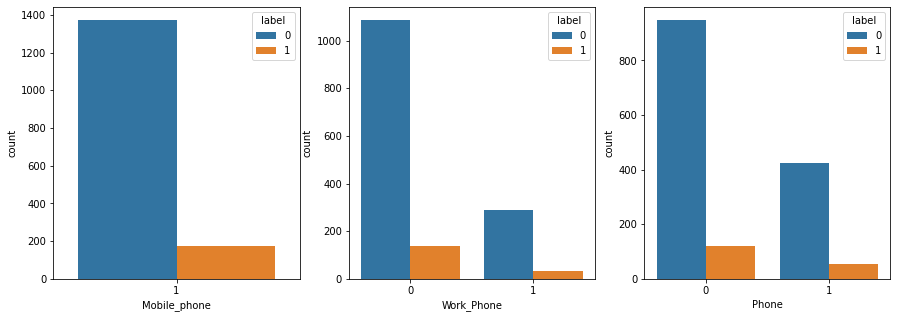

In [ ]:
plt.figure(figsize=(15,5))
for i,col in enumerate(phone_col):
  plt.subplot(1,3,i+1)
  sns.countplot(data=df3_phone,x=col,hue='label')

In [ ]:
er_col = []
for col in df3.columns:
  if col.endswith("er"):
    er_col.append(col)
len(er_col)

2

In [ ]:
df3_er =df3[er_col+['label']]
df3_er.head()

Car_Owner Propert_Owner  label
0         Y             Y      1
1         Y             N      1
2         Y             N      1
3         Y             N      1
4         Y             N      1

In [ ]:
ER_col = []
for col in df3.columns:
  if col.endswith("ER"):
    ER_col.append(col)
len(ER_col)

1

In [ ]:
df3_ER=df3[ER_col+['label']]
df3_ER.head()

GENDER  label
0      M      1
1      F      1
2      F      1
3      F      1
4      F      1

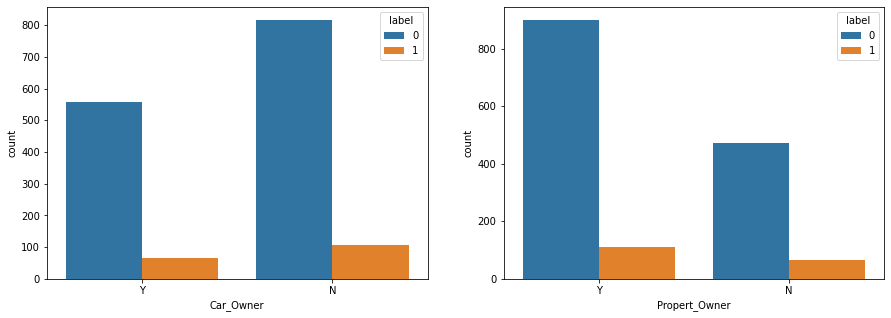

In [ ]:
plt.figure(figsize=(15,5))
for i,col in enumerate(er_col):
  plt.subplot(1,2,i+1)
  sns.countplot(data=df3_er,x=col,hue='label')

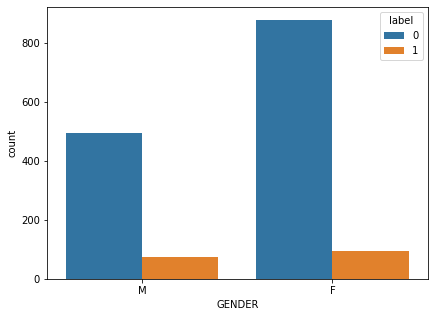

In [ ]:
plt.figure(figsize=(15,5))
for i,col in enumerate(ER_col):
  plt.subplot(1,2,i+1)
  sns.countplot(data=df3_ER,x=col,hue='label')

In [ ]:
#Dropping Unneccessary columns from the dataframe
df3 =df3.drop(['Ind_ID'], axis=1)

In [ ]:
## Converting males to 0 and females to 1
df3['Car_Owner'] =df3.Car_Owner.map({'Y':0,'N':1})
df3['Propert_Owner'] = df3.Propert_Owner.map({'Y':0,'N':1})



In [ ]:
df3.head()

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0      M          0              0         0       180000.0   
1      F          0              1         0       315000.0   
2      F          0              1         0       315000.0   
3      F          0              1         0            NaN   
4      F          0              1         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

Creating dummy variables to perform advance imputation techniques
There are so many missing values in two columns hence mean or median will not be a good approach.
We are just using KNN imuptation to fill the missing values

In [ ]:
df4 = pd.get_dummies(df3,columns=['GENDER'])

In [ ]:
df4.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income           Type_Income  \
0          0              0         0       180000.0             Pensioner   
1          0              1         0       315000.0  Commercial associate   
2          0              1         0       315000.0  Commercial associate   
3          0              1         0            NaN  Commercial associate   
4          0              1         0       315000.0  Commercial associate   

          EDUCATION Marital_status       Housing_type  Birthday_count  \
0  Higher education        Married  House / apartment        -18772.0   
1  Higher education        Married  House / apartment        -13557.0   
2  Higher education        Married  House / apartment             NaN   
3  Higher education        Married  House / apartment        -13557.0   
4  Higher education        Married  House / apartment        -13557.0   

   Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0         365243             1           0      0         0             NaN   
1           -586             1           1      1         0             NaN   
2           -586             1           1      1         0             NaN   
3           -586             1           1      1         0             NaN   
4           -586             1           1      1         0             NaN   

   Family_Members  label  GENDER_F  GENDER_M  
0               2      1         0         1  
1               2      1         1         0  
2               2      1         1         0  
3               2      1         1         0  
4               2      1         1         0

In [ ]:
days_col = []
for col in df4.columns:
  if col.endswith("days"):
    days_col.append(col)
days_col

['Employed_days']

In [ ]:
df4['Employed_days'] = abs(df4['Employed_days'])

In [ ]:
df4.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income           Type_Income  \
0          0              0         0       180000.0             Pensioner   
1          0              1         0       315000.0  Commercial associate   
2          0              1         0       315000.0  Commercial associate   
3          0              1         0            NaN  Commercial associate   
4          0              1         0       315000.0  Commercial associate   

          EDUCATION Marital_status       Housing_type  Birthday_count  \
0  Higher education        Married  House / apartment        -18772.0   
1  Higher education        Married  House / apartment        -13557.0   
2  Higher education        Married  House / apartment             NaN   
3  Higher education        Married  House / apartment        -13557.0   
4  Higher education        Married  House / apartment        -13557.0   

   Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0         365243             1           0      0         0             NaN   
1            586             1           1      1         0             NaN   
2            586             1           1      1         0             NaN   
3            586             1           1      1         0             NaN   
4            586             1           1      1         0             NaN   

   Family_Members  label  GENDER_F  GENDER_M  
0               2      1         0         1  
1               2      1         1         0  
2               2      1         1         0  
3               2      1         1         0  
4               2      1         1         0

In [ ]:
days_col1 = []
for col in df4.columns:
  if col.endswith("count"):
    days_col1.append(col)
days_col1

['Birthday_count']

In [ ]:
df4['Birthday_count'] = abs(df4['Birthday_count'])

In [ ]:
df4['Type_Income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [ ]:
df4['Type_Income'].nunique()

4

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Type_Income_mapping = {"Working":0,"Commercial associate":1,"Pensioner":2,"State servant":3}
df4['Type_Income'] = df4['Type_Income'].map(Type_Income_mapping)
df4['Type_Income'] = encoder.fit_transform(df4['Type_Income'])


In [ ]:
df4['Type_Income'].value_counts()

0    798
1    365
2    269
3    116
Name: Type_Income, dtype: int64

In [ ]:
df4['Type_Occupation']=df4['Type_Occupation'].fillna((df4['Type_Occupation'].mode()[0]))

In [ ]:
df4['Type_Occupation'].isnull().sum()

0

In [ ]:
df4['Type_Occupation'].value_counts()

Laborers                 756
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [ ]:
df4['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [ ]:
df4['Type_Occupation'] = df4['Type_Occupation'].replace("Waiters/barmen staff", "Waiters")
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Type_Occupation_mapping = {"Laborers":0,"Core staff":1,"Managers":2,"Sales staff":3,"Drivers":4,
                          "High skill tech staff":5,"Medicine staff":6,"Accountants":7,"Security staff":8,
                          "Cleaning staff":9,"Cooking staff":10,"Private service staff":11,"Secretaries":12,
                         "Low-skill Laborers":13,"Waiters":14,"HR staff":15,"IT staff":16,"Realty agents":17 }
df4['Type_Occupation'] = df4['Type_Occupation'].map(Type_Occupation_mapping)
df4['Type_Occupation'] = encoder.fit_transform(df4['Type_Occupation'])

In [ ]:
df4['Type_Occupation'].value_counts()

0     756
1     174
2     136
3     122
4      86
5      65
6      50
7      44
8      25
9      22
10     21
11     17
12      9
13      9
14      5
15      3
16      2
17      2
Name: Type_Occupation, dtype: int64

In [ ]:
df4['EDUCATION'] = df4['EDUCATION'].replace('Incomplete higher','Academic degree')



In [ ]:
df4['EDUCATION'] = df4['EDUCATION'].replace('Secondary / secondary special','Secondary')

In [ ]:
df4['EDUCATION'].value_counts()

Secondary           1031
Higher education     426
Academic degree       70
Lower secondary       21
Name: EDUCATION, dtype: int64

In [ ]:
df4['EDUCATION'] = df4['EDUCATION'].map({"Lower secondary":0,"Secondary":1,"Academic degree":2,"Higher education":3})

In [ ]:
# exploring all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(df4)

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
0             0              0         0       180000.0            2   
1             0              1         0       315000.0            1   
2             0              1         0       315000.0            1   
3             0              1         0            NaN            1   
4             0              1         0       315000.0            1   
5             0              1         0       315000.0            2   
6             0              1         0       315000.0            1   
7             1              1         0       180000.0            2   
8             0              0         1       450000.0            1   
9             0              0         1       450000.0            2   
10            0              0         1       450000.0            1   
11            0              0         0        90000.0            0   
12            0              0         0            NaN            0   
13            0              0         0        90000.0            0   
14            1              1         1       472500.0            2   
15            1              0         0       270000.0            0   
16            1              0         0       270000.0            0   
17            1              0         0       126000.0            1   
18            1              0         0       126000.0            1   
19            1              0         0        90000.0            2   
20            1              1         0       202500.0            0   
21            0              0         0       202500.0            1   
22            1              0         0       157500.0            1   
23            1              0         2       112500.0            1   
24            1              0         0       180000.0            0   
25            0              0         0       540000.0            1   
26            1              0         0       112500.0            2   
27            1              0         0            NaN            2   
28            1              0         0       292500.0            0   
29            1              1         0       540000.0            1   
30            1              0         0        90000.0            0   
31            1              0         0       112500.0            2   
32            1              1         0       135000.0            0   
33            0              1         1       135000.0            0   
34            1              0         0       180000.0            0   
35            0              1         0       112500.0            3   
36            0              0         0       292500.0            0   
37            0              0         0        76500.0            2   
38            0              0         0       215100.0            1   
39            0              0         0       450000.0            1   
40            0              1         2       270000.0            3   
41            1              0         0       225000.0            2   
42            1              0         0       225000.0            2   
43            1              0         0       225000.0            2   
44            1              0         1       157500.0            1   
45            1              0         1       157500.0            2   
46            1              0         1        67500.0            1   
47            0              1         1       180000.0            1   
48            0              1         1       180000.0            1   
49            1              1         0       157500.0            0   
50            1              1         0       157500.0            0   
51            1              1         0       171000.0            1   
52            0              1         1       135000.0            0   
53            0              1         1       135000.0            0   
54            1              0         0      

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Owner        1548 non-null   int64  
 1   Propert_Owner    1548 non-null   int64  
 2   CHILDREN         1548 non-null   int64  
 3   Annual_income    1525 non-null   float64
 4   Type_Income      1548 non-null   int64  
 5   EDUCATION        1548 non-null   int64  
 6   Marital_status   1548 non-null   object 
 7   Housing_type     1548 non-null   object 
 8   Birthday_count   1526 non-null   float64
 9   Employed_days    1548 non-null   int64  
 10  Mobile_phone     1548 non-null   int64  
 11  Work_Phone       1548 non-null   int64  
 12  Phone            1548 non-null   int64  
 13  EMAIL_ID         1548 non-null   int64  
 14  Type_Occupation  1548 non-null   int64  
 15  Family_Members   1548 non-null   int64  
 16  label            1548 non-null   int64  
 17  GENDER_F      

In [ ]:
df4['EDUCATION'].value_counts()

1    1031
3     426
2      70
0      21
Name: EDUCATION, dtype: int64

In [ ]:
df4['Marital_status'] = df4['Marital_status'].replace("Single / not married", "Single")

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Marital_status_mapping = {"Married":0,"Single":1,"Civil marriage":2,"Separated":3,"Widow":4}
df4['Marital_status'] = df4['Marital_status'].map(Marital_status_mapping)
df4['Marital_status'] = encoder.fit_transform(df4['Marital_status'])


In [ ]:
df4['Marital_status'].value_counts()

0    1049
1     227
2     101
3      96
4      75
Name: Marital_status, dtype: int64

In [ ]:
df4.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0          0              0         0       180000.0            2          3   
1          0              1         0       315000.0            1          3   
2          0              1         0       315000.0            1          3   
3          0              1         0            NaN            1          3   
4          0              1         0       315000.0            1          3   

   Marital_status       Housing_type  Birthday_count  Employed_days  \
0               0  House / apartment         18772.0         365243   
1               0  House / apartment         13557.0            586   
2               0  House / apartment             NaN            586   
3               0  House / apartment         13557.0            586   
4               0  House / apartment         13557.0            586   

   Mobile_phone  Work_Phone  Phone  EMAIL_ID  Type_Occupation  Family_Members  \
0             1           0      0         0                0               2   
1             1           1      1         0                0               2   
2             1           1      1         0                0               2   
3             1           1      1         0                0               2   
4             1           1      1         0                0               2   

   label  GENDER_F  GENDER_M  
0      1         0         1  
1      1         1         0  
2      1         1         0  
3      1         1         0  
4      1         1         0

In [ ]:
df4['Marital_status'].value_counts()

0    1049
1     227
2     101
3      96
4      75
Name: Marital_status, dtype: int64

In [ ]:
df4['Housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [ ]:
df4['Housing_type'] = df4['Housing_type'].replace('House / apartment','House')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Housing_type_mapping = {"House":0,"With parents":1,"Municipal apartment":2,"Rented apartment":3,"Office apartment":4,"Co-op apartment":5}
df4['Housing_type'] = df4['Housing_type'].map(Housing_type_mapping)
df4['Housing_type'] = encoder.fit_transform(df4['Housing_type'])


In [ ]:
df4['Housing_type'].value_counts()

0    1380
1      80
2      53
3      21
4       9
5       5
Name: Housing_type, dtype: int64

In [ ]:
df4.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0          0              0         0       180000.0            2          3   
1          0              1         0       315000.0            1          3   
2          0              1         0       315000.0            1          3   
3          0              1         0            NaN            1          3   
4          0              1         0       315000.0            1          3   

   Marital_status  Housing_type  Birthday_count  Employed_days  Mobile_phone  \
0               0             0         18772.0         365243             1   
1               0             0         13557.0            586             1   
2               0             0             NaN            586             1   
3               0             0         13557.0            586             1   
4               0             0         13557.0            586             1   

   Work_Phone  Phone  EMAIL_ID  Type_Occupation  Family_Members  label  \
0           0      0         0                0               2      1   
1           1      1         0                0               2      1   
2           1      1         0                0               2      1   
3           1      1         0                0               2      1   
4           1      1         0                0               2      1   

   GENDER_F  GENDER_M  
0         0         1  
1         1         0  
2         1         0  
3         1         0  
4         1         0

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Owner        1548 non-null   int64  
 1   Propert_Owner    1548 non-null   int64  
 2   CHILDREN         1548 non-null   int64  
 3   Annual_income    1525 non-null   float64
 4   Type_Income      1548 non-null   int64  
 5   EDUCATION        1548 non-null   int64  
 6   Marital_status   1548 non-null   int64  
 7   Housing_type     1548 non-null   int64  
 8   Birthday_count   1526 non-null   float64
 9   Employed_days    1548 non-null   int64  
 10  Mobile_phone     1548 non-null   int64  
 11  Work_Phone       1548 non-null   int64  
 12  Phone            1548 non-null   int64  
 13  EMAIL_ID         1548 non-null   int64  
 14  Type_Occupation  1548 non-null   int64  
 15  Family_Members   1548 non-null   int64  
 16  label            1548 non-null   int64  
 17  GENDER_F      

In [ ]:
df4.isnull().sum()

Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count     22
Employed_days       0
Mobile_phone        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation     0
Family_Members      0
label               0
GENDER_F            0
GENDER_M            0
dtype: int64

In [ ]:
df4['EDUCATION'].unique()

array([3, 1, 0, 2])

In [ ]:
df7 =df4.drop(['GENDER_M','Mobile_phone','Phone','Work_Phone','EMAIL_ID'], axis=1) 

In [ ]:
df7.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0          0              0         0       180000.0            2          3   
1          0              1         0       315000.0            1          3   
2          0              1         0       315000.0            1          3   
3          0              1         0            NaN            1          3   
4          0              1         0       315000.0            1          3   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0               0             0         18772.0         365243   
1               0             0         13557.0            586   
2               0             0             NaN            586   
3               0             0         13557.0            586   
4               0             0         13557.0            586   

   Type_Occupation  Family_Members  label  GENDER_F  
0                0               2      1         0  
1                0               2      1         1  
2                0               2      1         1  
3                0               2      1         1  
4                0               2      1         1

In [ ]:
df4['Housing_type'].value_counts()

0    1380
1      80
2      53
3      21
4       9
5       5
Name: Housing_type, dtype: int64

In [ ]:
df7.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0          0              0         0       180000.0            2          3   
1          0              1         0       315000.0            1          3   
2          0              1         0       315000.0            1          3   
3          0              1         0            NaN            1          3   
4          0              1         0       315000.0            1          3   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0               0             0         18772.0         365243   
1               0             0         13557.0            586   
2               0             0             NaN            586   
3               0             0         13557.0            586   
4               0             0         13557.0            586   

   Type_Occupation  Family_Members  label  GENDER_F  
0                0               2      1         0  
1                0               2      1         1  
2                0               2      1         1  
3                0               2      1         1  
4                0               2      1         1

In [ ]:
# Splitting outcome and features to avoid data leakage
label1 = df7['label']
Features = df7.drop(['label'], axis = 1)

In [ ]:
Features.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0          0              0         0       180000.0            2          3   
1          0              1         0       315000.0            1          3   
2          0              1         0       315000.0            1          3   
3          0              1         0            NaN            1          3   
4          0              1         0       315000.0            1          3   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0               0             0         18772.0         365243   
1               0             0         13557.0            586   
2               0             0             NaN            586   
3               0             0         13557.0            586   
4               0             0         13557.0            586   

   Type_Occupation  Family_Members  GENDER_F  
0                0               2         0  
1                0               2         1  
2                0               2         1  
3                0               2         1  
4                0               2         1

In [ ]:
Features.isnull().sum()

Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count     22
Employed_days       0
Type_Occupation     0
Family_Members      0
GENDER_F            0
dtype: int64

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fancyimpute import KNN
knn_imputer = KNN()
Features_knn = Features.copy(deep=True)
Features_knn.iloc[:, :] = knn_imputer.fit_transform(Features_knn)

Imputing row 1/1548 with 0 missing, elapsed time: 0.428
Imputing row 101/1548 with 0 missing, elapsed time: 0.431
Imputing row 201/1548 with 0 missing, elapsed time: 0.432
Imputing row 301/1548 with 0 missing, elapsed time: 0.433
Imputing row 401/1548 with 0 missing, elapsed time: 0.435
Imputing row 501/1548 with 0 missing, elapsed time: 0.435
Imputing row 601/1548 with 0 missing, elapsed time: 0.437
Imputing row 701/1548 with 0 missing, elapsed time: 0.437
Imputing row 801/1548 with 0 missing, elapsed time: 0.438
Imputing row 901/1548 with 0 missing, elapsed time: 0.439
Imputing row 1001/1548 with 0 missing, elapsed time: 0.440
Imputing row 1101/1548 with 0 missing, elapsed time: 0.441
Imputing row 1201/1548 with 0 missing, elapsed time: 0.442
Imputing row 1301/1548 with 0 missing, elapsed time: 0.442
Imputing row 1401/1548 with 0 missing, elapsed time: 0.443
Imputing row 1501/1548 with 0 missing, elapsed time: 0.443


In [ ]:
Features_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Owner        1548 non-null   float64
 1   Propert_Owner    1548 non-null   float64
 2   CHILDREN         1548 non-null   float64
 3   Annual_income    1548 non-null   float64
 4   Type_Income      1548 non-null   float64
 5   EDUCATION        1548 non-null   float64
 6   Marital_status   1548 non-null   float64
 7   Housing_type     1548 non-null   float64
 8   Birthday_count   1548 non-null   float64
 9   Employed_days    1548 non-null   float64
 10  Type_Occupation  1548 non-null   float64
 11  Family_Members   1548 non-null   float64
 12  GENDER_F         1548 non-null   float64
dtypes: float64(13)
memory usage: 169.3 KB


In [ ]:
Features_knn.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   

   Type_Occupation  Family_Members  GENDER_F  
0              0.0             2.0       0.0  
1              0.0             2.0       1.0  
2              0.0             2.0       1.0  
3              0.0             2.0       1.0  
4              0.0             2.0       1.0

In [ ]:
Features_knn.tail()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1543        1.0            0.0       0.0  171441.763709          1.0   
1544        1.0            1.0       0.0  225000.000000          1.0   
1545        0.0            0.0       2.0  180000.000000          0.0   
1546        0.0            1.0       0.0  270000.000000          0.0   
1547        0.0            0.0       0.0  225000.000000          0.0   

      EDUCATION  Marital_status  Housing_type  Birthday_count  Employed_days  \
1543        3.0             0.0           0.0         11957.0         2182.0   
1544        2.0             1.0           0.0         10229.0         1209.0   
1545        3.0             0.0           0.0         13174.0         2477.0   
1546        1.0             2.0           0.0         15292.0          645.0   
1547        3.0             0.0           0.0         16601.0         2859.0   

      Type_Occupation  Family_Members  GENDER_F  
1543              2.0             2.0       1.0  
1544              7.0             1.0       1.0  
1545              2.0             4.0       0.0  
1546              4.0             2.0       0.0  
1547              0.0             2.0       1.0

In [ ]:
Features_knn['Annual_income'].value_counts()

1.350000e+05    170
1.125000e+05    144
1.800000e+05    137
1.575000e+05    125
2.250000e+05    119
2.025000e+05     98
2.700000e+05     69
9.000000e+04     61
3.150000e+05     50
2.475000e+05     38
3.600000e+05     33
6.750000e+04     33
4.500000e+05     29
1.260000e+05     27
2.925000e+05     27
9.900000e+04     18
1.035000e+05     17
8.100000e+04     14
1.215000e+05     14
3.375000e+05     14
1.440000e+05     13
2.160000e+05     12
7.650000e+04     10
1.935000e+05     10
1.080000e+05     10
1.485000e+05     10
4.050000e+05      9
1.170000e+05      9
3.060000e+05      9
1.710000e+05      9
7.200000e+04      9
9.450000e+04      8
1.890000e+05      7
1.980000e+05      7
1.665000e+05      7
1.305000e+05      7
1.620000e+05      6
1.530000e+05      5
2.610000e+05      5
2.340000e+05      5
4.500000e+04      5
8.550000e+04      5
2.070000e+05      4
2.115000e+05      4
5.400000e+04      4
3.915000e+05      4
9.000000e+05      4
2.565000e+05      3
2.520000e+05      3
2.430000e+05      3


In [ ]:
Features_knn['Annual_income'].unique()

array([ 180000.        ,  315000.        ,  450000.        ,
         90000.        ,   90000.00026716,  472500.        ,
        270000.        ,  126000.        ,  202500.        ,
        157500.        ,  112500.        ,  540000.        ,
        130499.87625068,  292500.        ,  135000.        ,
         76500.        ,  215100.        ,  225000.        ,
         67500.        ,  171000.        ,  103500.        ,
         99000.        ,   99000.03535691,  391500.        ,
         65250.        ,   72900.        ,  179997.84133125,
        360000.        ,  256500.        ,  675000.        ,
        247500.        ,   85500.        ,  121500.        ,
        221670.27814443,  130500.        ,  163800.        ,
        211500.        ,   81000.        ,   72000.        ,
        148500.        ,  162000.        ,  195750.        ,
        585000.        ,  450000.00004223,  216000.        ,
        306000.        ,  108000.        ,   63000.        ,
         45000.        ,

In [ ]:
Features_knn['Birthday_count'].unique()

array([18772., 13557., 22134., ..., 10229., 15292., 16601.])

In [ ]:
Features_knn['Birthday_count'].value_counts()

13557.000000    6
21363.000000    5
22655.000000    5
14523.000000    5
17915.000000    4
23286.000000    4
17454.000000    4
24611.000000    4
18173.000000    4
16413.000000    3
10101.000000    3
16424.000000    3
20103.000000    3
10660.000000    3
11998.000000    3
17532.000000    3
17841.000000    3
13682.000000    3
14522.000000    3
18952.000000    3
18950.000000    3
15438.000000    3
17202.000000    3
9810.000000     3
10177.000000    3
13720.000000    3
14897.000000    3
9242.000000     3
16027.000000    3
9847.000000     3
22034.000000    3
18335.000000    3
16011.000000    3
12348.000000    3
22002.000000    3
10142.000000    2
17579.000000    2
9006.000000     2
9488.000000     2
13174.000000    2
11268.000000    2
10457.000000    2
14358.000000    2
12483.000000    2
21944.000000    2
10837.000000    2
15185.000000    2
15436.000000    2
11970.000000    2
21454.000000    2
20661.000000    2
21897.000000    2
17152.000000    2
14746.000000    2
17237.000000    2
19010.0000

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Features_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Owner        1548 non-null   float64
 1   Propert_Owner    1548 non-null   float64
 2   CHILDREN         1548 non-null   float64
 3   Annual_income    1548 non-null   float64
 4   Type_Income      1548 non-null   float64
 5   EDUCATION        1548 non-null   float64
 6   Marital_status   1548 non-null   float64
 7   Housing_type     1548 non-null   float64
 8   Birthday_count   1548 non-null   float64
 9   Employed_days    1548 non-null   float64
 10  Type_Occupation  1548 non-null   float64
 11  Family_Members   1548 non-null   float64
 12  GENDER_F         1548 non-null   float64
dtypes: float64(13)
memory usage: 169.3 KB


In [ ]:
Features.describe()

Car_Owner  Propert_Owner     CHILDREN  Annual_income  Type_Income  \
count  1548.000000    1548.000000  1548.000000   1.525000e+03  1548.000000   
mean      0.596899       0.347545     0.412791   1.913993e+05     0.808140   
std       0.490679       0.476345     0.776691   1.132530e+05     0.976127   
min       0.000000       0.000000     0.000000   3.375000e+04     0.000000   
25%       0.000000       0.000000     0.000000   1.215000e+05     0.000000   
50%       1.000000       0.000000     0.000000   1.665000e+05     0.000000   
75%       1.000000       1.000000     1.000000   2.250000e+05     1.000000   
max       1.000000       1.000000    14.000000   1.575000e+06     3.000000   

         EDUCATION  Marital_status  Housing_type  Birthday_count  \
count  1548.000000     1548.000000   1548.000000     1526.000000   
mean      1.582041        0.656977      0.200258    16040.342071   
std       0.906267        1.144633      0.666843     4229.503202   
min       0.000000        0.000000      0.000000     7705.000000   
25%       1.000000        0.000000      0.000000    12417.000000   
50%       1.000000        0.000000      0.000000    15661.500000   
75%       3.000000        1.000000      0.000000    19553.000000   
max       3.000000        4.000000      5.000000    24946.000000   

       Employed_days  Type_Occupation  Family_Members     GENDER_F  
count    1548.000000      1548.000000     1548.000000  1548.000000  
mean    63798.647287         2.125323        2.161499     0.628553  
std    135810.927959         3.101565        0.947772     0.483348  
min        73.000000         0.000000        1.000000     0.000000  
25%      1161.000000         0.000000        2.000000     0.000000  
50%      2479.000000         1.000000        2.000000     1.000000  
75%      6043.500000         3.000000        3.000000     1.000000  
max    365243.000000        17.000000       15.000000     1.000000

In [ ]:
Features_knn.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   

   Type_Occupation  Family_Members  GENDER_F  
0              0.0             2.0       0.0  
1              0.0             2.0       1.0  
2              0.0             2.0       1.0  
3              0.0             2.0       1.0  
4              0.0             2.0       1.0

In [ ]:
# Imputation using MICE
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
Features_MICE = Features_knn.copy(deep=True)
Features_MICE.iloc[:, :] = MICE_imputer.fit_transform(Features_MICE)

<Axes: xlabel='Annual_income', ylabel='Count'>

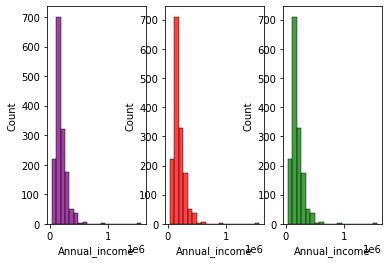

In [ ]:
fig, ax =plt.subplots(1,3)
sns.histplot(df7['Annual_income'],bins=20, color="purple", ax=ax[0])
sns.histplot(Features_knn['Annual_income'], color="red", bins=20, ax=ax[1])
sns.histplot(Features_MICE['Annual_income'], color="green", bins=20, ax=ax[2])

<Axes: xlabel='Type_Occupation', ylabel='Count'>

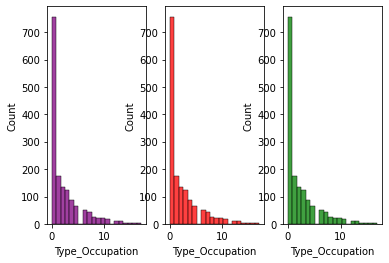

In [ ]:
fig, ax =plt.subplots(1,3)
sns.histplot(df7['Type_Occupation'],bins=20, color="purple", ax=ax[0])
sns.histplot(Features_knn['Type_Occupation'], color="red", bins=20, ax=ax[1])
sns.histplot(Features_MICE['Type_Occupation'], color="green", bins=20, ax=ax[2])

<Axes: xlabel='Family_Members', ylabel='count'>

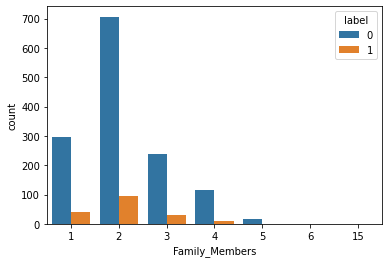

In [ ]:
sns.countplot(data=df7,x='Family_Members', hue='label')

<Axes: xlabel='Type_Occupation', ylabel='count'>

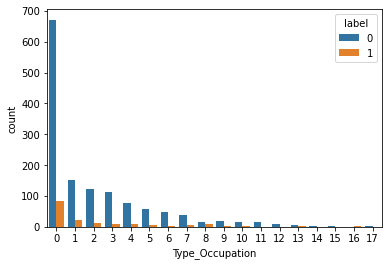

In [ ]:
sns.countplot(data=df7,x='Type_Occupation', hue='label')

<Axes: xlabel='Propert_Owner', ylabel='count'>

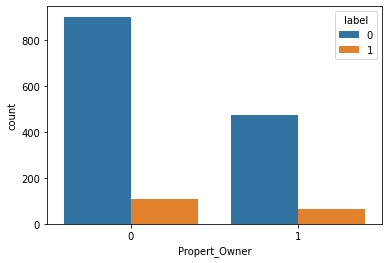

In [ ]:
sns.countplot(data=df7,x='Propert_Owner', hue='label')

<Axes: xlabel='Type_Income', ylabel='count'>

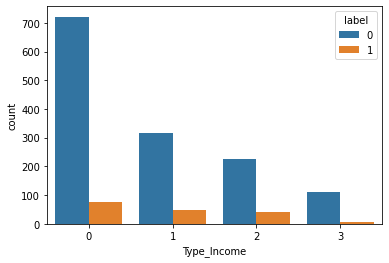

In [ ]:
sns.countplot(data=df7, x= 'Type_Income',hue='label')

<Axes: xlabel='Marital_status', ylabel='label'>

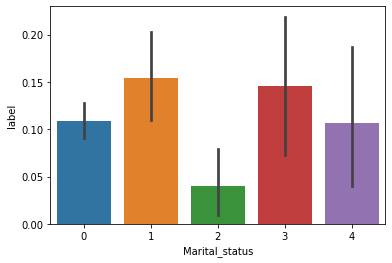

In [ ]:
sns.barplot(data=df7,x='Marital_status',y='label')

In [ ]:
df7['Family_Members'].value_counts()

2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: Family_Members, dtype: int64

<Axes: xlabel='Annual_income', ylabel='Count'>

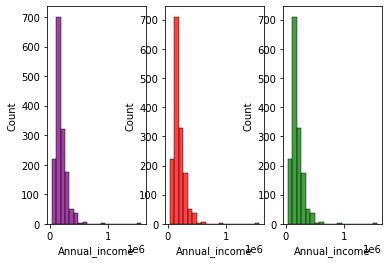

In [ ]:
fig, ax =plt.subplots(1,3)
sns.histplot(df7['Annual_income'],bins=20, color="purple", ax=ax[0])
sns.histplot(Features_knn['Annual_income'], color="red", bins=20, ax=ax[1])
sns.histplot(Features_MICE['Annual_income'], color="green", bins=20, ax=ax[2])

In [ ]:
df7['label']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


Text(0, 0.5, 'Annual_income')

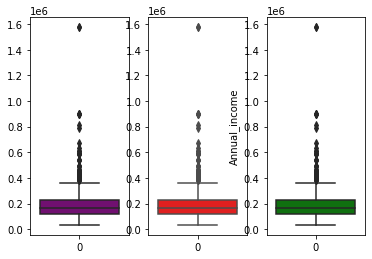

In [ ]:
fig, ax =plt.subplots(1,3)
sns.boxplot(df7['Annual_income'], color="purple", ax=ax[0])
sns.boxplot(Features_knn['Annual_income'], color="red", ax=ax[1])
sns.boxplot(Features_MICE['Annual_income'], color="green", ax=ax[2])
plt.ylabel('Annual_income')

Text(0, 0.5, 'Annual_income')

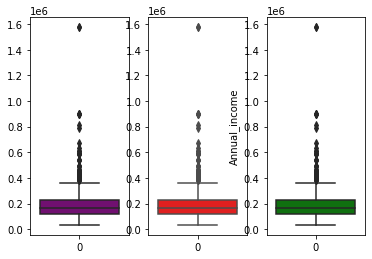

In [ ]:
fig, ax =plt.subplots(1,3)
sns.boxplot(df7['Annual_income'], color="purple", ax=ax[0])
sns.boxplot(Features_knn['Annual_income'], color="red", ax=ax[1])
sns.boxplot(Features_MICE['Annual_income'], color="green", ax=ax[2])
plt.ylabel('Annual_income')

In [ ]:
Features_knn.describe() # using describe function to see if there is any discrepency in numerical measures 

Car_Owner  Propert_Owner     CHILDREN  Annual_income  Type_Income  \
count  1548.000000    1548.000000  1548.000000   1.548000e+03  1548.000000   
mean      0.596899       0.347545     0.412791   1.914067e+05     0.808140   
std       0.490679       0.476345     0.776691   1.128656e+05     0.976127   
min       0.000000       0.000000     0.000000   3.375000e+04     0.000000   
25%       0.000000       0.000000     0.000000   1.215000e+05     0.000000   
50%       1.000000       0.000000     0.000000   1.665000e+05     0.000000   
75%       1.000000       1.000000     1.000000   2.250000e+05     1.000000   
max       1.000000       1.000000    14.000000   1.575000e+06     3.000000   

         EDUCATION  Marital_status  Housing_type  Birthday_count  \
count  1548.000000     1548.000000   1548.000000     1548.000000   
mean      1.582041        0.656977      0.200258    16041.360750   
std       0.906267        1.144633      0.666843     4220.356959   
min       0.000000        0.000000      0.000000     7705.000000   
25%       1.000000        0.000000      0.000000    12477.750000   
50%       1.000000        0.000000      0.000000    15649.500000   
75%       3.000000        1.000000      0.000000    19533.500000   
max       3.000000        4.000000      5.000000    24946.000000   

       Employed_days  Type_Occupation  Family_Members     GENDER_F  
count    1548.000000      1548.000000     1548.000000  1548.000000  
mean    63798.647287         2.125323        2.161499     0.628553  
std    135810.927959         3.101565        0.947772     0.483348  
min        73.000000         0.000000        1.000000     0.000000  
25%      1161.000000         0.000000        2.000000     0.000000  
50%      2479.000000         1.000000        2.000000     1.000000  
75%      6043.500000         3.000000        3.000000     1.000000  
max    365243.000000        17.000000       15.000000     1.000000

In [ ]:
Features_MICE.describe() # using describe function to see if there is any discrepency in numerical measures 

Car_Owner  Propert_Owner     CHILDREN  Annual_income  Type_Income  \
count  1548.000000    1548.000000  1548.000000   1.548000e+03  1548.000000   
mean      0.596899       0.347545     0.412791   1.914067e+05     0.808140   
std       0.490679       0.476345     0.776691   1.128656e+05     0.976127   
min       0.000000       0.000000     0.000000   3.375000e+04     0.000000   
25%       0.000000       0.000000     0.000000   1.215000e+05     0.000000   
50%       1.000000       0.000000     0.000000   1.665000e+05     0.000000   
75%       1.000000       1.000000     1.000000   2.250000e+05     1.000000   
max       1.000000       1.000000    14.000000   1.575000e+06     3.000000   

         EDUCATION  Marital_status  Housing_type  Birthday_count  \
count  1548.000000     1548.000000   1548.000000     1548.000000   
mean      1.582041        0.656977      0.200258    16041.360750   
std       0.906267        1.144633      0.666843     4220.356959   
min       0.000000        0.000000      0.000000     7705.000000   
25%       1.000000        0.000000      0.000000    12477.750000   
50%       1.000000        0.000000      0.000000    15649.500000   
75%       3.000000        1.000000      0.000000    19533.500000   
max       3.000000        4.000000      5.000000    24946.000000   

       Employed_days  Type_Occupation  Family_Members     GENDER_F  
count    1548.000000      1548.000000     1548.000000  1548.000000  
mean    63798.647287         2.125323        2.161499     0.628553  
std    135810.927959         3.101565        0.947772     0.483348  
min        73.000000         0.000000        1.000000     0.000000  
25%      1161.000000         0.000000        2.000000     0.000000  
50%      2479.000000         1.000000        2.000000     1.000000  
75%      6043.500000         3.000000        3.000000     1.000000  
max    365243.000000        17.000000       15.000000     1.000000


From overall exploration it seems that 

MICE and KNN both performed well

Hence, I will go ahead with KNN imputation

In [ ]:
df7_miss= pd.concat([Features_knn,label1], axis=1) # concatenating independent and dependent variable
df7_miss.head(10)

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   
5        0.0            1.0       0.0       315000.0          2.0        3.0   
6        0.0            1.0       0.0       315000.0          1.0        3.0   
7        1.0            1.0       0.0       180000.0          2.0        1.0   
8        0.0            0.0       1.0       450000.0          1.0        1.0   
9        0.0            0.0       1.0       450000.0          2.0        1.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   
5             0.0           0.0         13557.0          586.0   
6             0.0           0.0         13557.0          586.0   
7             0.0           0.0         22134.0       365243.0   
8             0.0           0.0         18173.0          678.0   
9             0.0           0.0         18173.0          678.0   

   Type_Occupation  Family_Members  GENDER_F  label  
0              0.0             2.0       0.0      1  
1              0.0             2.0       1.0      1  
2              0.0             2.0       1.0      1  
3              0.0             2.0       1.0      1  
4              0.0             2.0       1.0      1  
5              0.0             2.0       0.0      1  
6              0.0             2.0       1.0      1  
7              0.0             2.0       1.0      1  
8              1.0             3.0       0.0      1  
9              1.0             3.0       0.0      1

In [ ]:
df7_miss.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   

   Type_Occupation  Family_Members  GENDER_F  label  
0              0.0             2.0       0.0      1  
1              0.0             2.0       1.0      1  
2              0.0             2.0       1.0      1  
3              0.0             2.0       1.0      1  
4              0.0             2.0       1.0      1

In [ ]:
df7_miss['Type_Income']

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
5       2.0
6       1.0
7       2.0
8       1.0
9       2.0
10      1.0
11      0.0
12      0.0
13      0.0
14      2.0
15      0.0
16      0.0
17      1.0
18      1.0
19      2.0
20      0.0
21      1.0
22      1.0
23      1.0
24      0.0
25      1.0
26      2.0
27      2.0
28      0.0
29      1.0
30      0.0
31      2.0
32      0.0
33      0.0
34      0.0
35      3.0
36      0.0
37      2.0
38      1.0
39      1.0
40      3.0
41      2.0
42      2.0
43      2.0
44      1.0
45      2.0
46      1.0
47      1.0
48      1.0
49      0.0
50      0.0
51      1.0
52      0.0
53      0.0
54      0.0
55      0.0
56      0.0
57      0.0
58      0.0
59      1.0
60      0.0
61      0.0
62      0.0
63      0.0
64      2.0
65      2.0
66      2.0
67      2.0
68      0.0
69      0.0
70      0.0
71      2.0
72      2.0
73      2.0
74      1.0
75      0.0
76      0.0
77      0.0
78      1.0
79      0.0
80      0.0
81      1.0
82      3.0
83  

In [ ]:
approved= len(df7_miss[df7_miss.label==0])

In [ ]:
approved= len(df7_miss[df7_miss.label==0])

In [ ]:
approved


1373

In [ ]:
not_approved = len(df7_miss[df7_miss.label==1])

In [ ]:
not_approved

175

In [ ]:
not_approved_pct = (175/1548) *100

In [ ]:
not_approved_pct

11.304909560723514

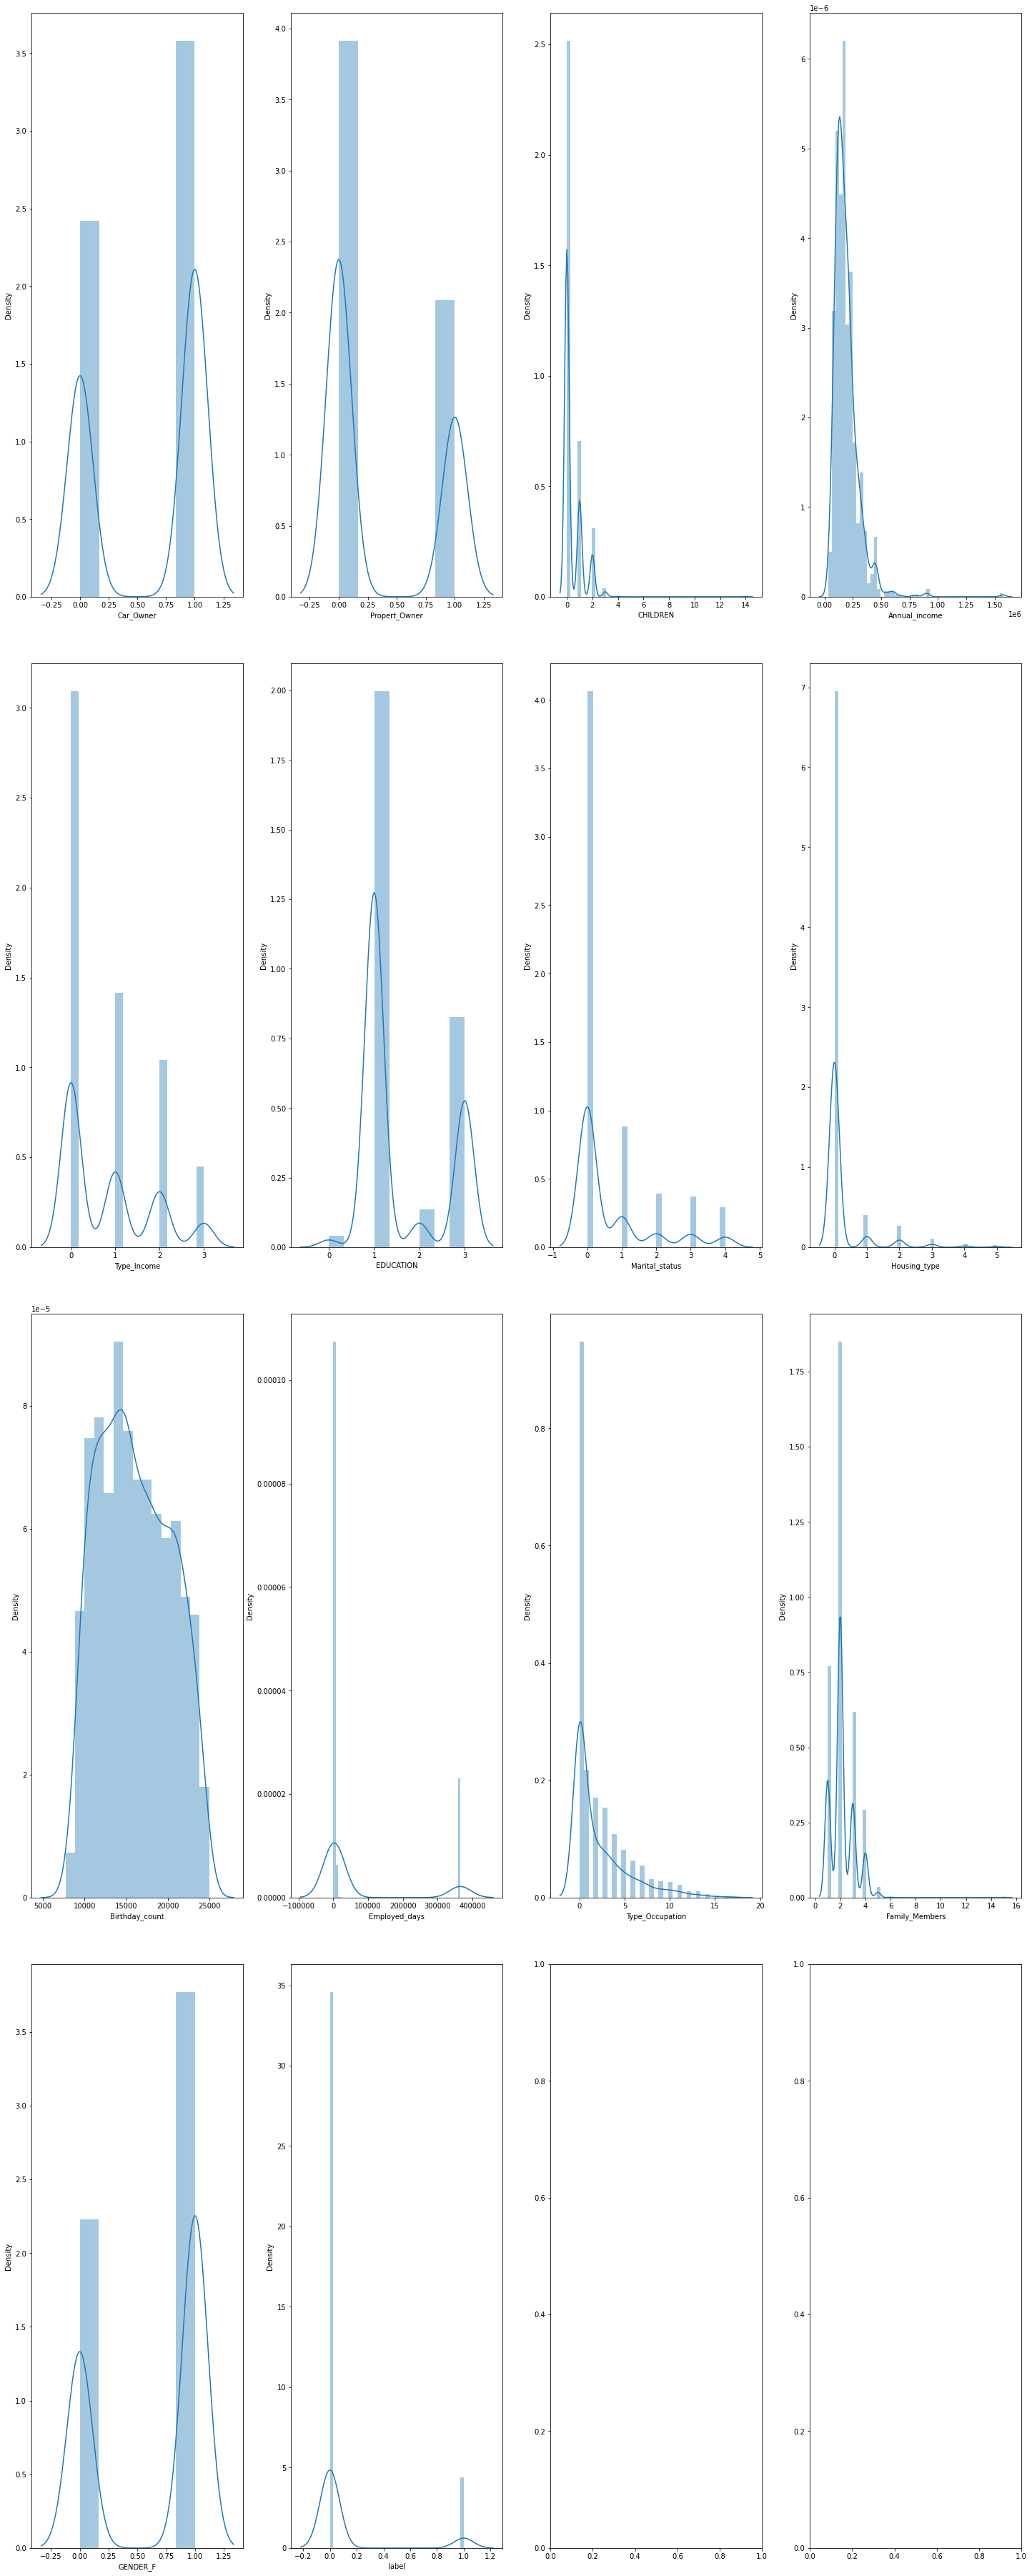

In [ ]:
# create disp plots
fig,ax = plt.subplots(ncols=4,nrows=4,figsize=(20,50))
index =0
ax =ax.ravel()
for col in df7_miss.columns:
  sns.distplot(df7_miss[col],ax = ax[index])
  index += 1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=5)


<Axes: >

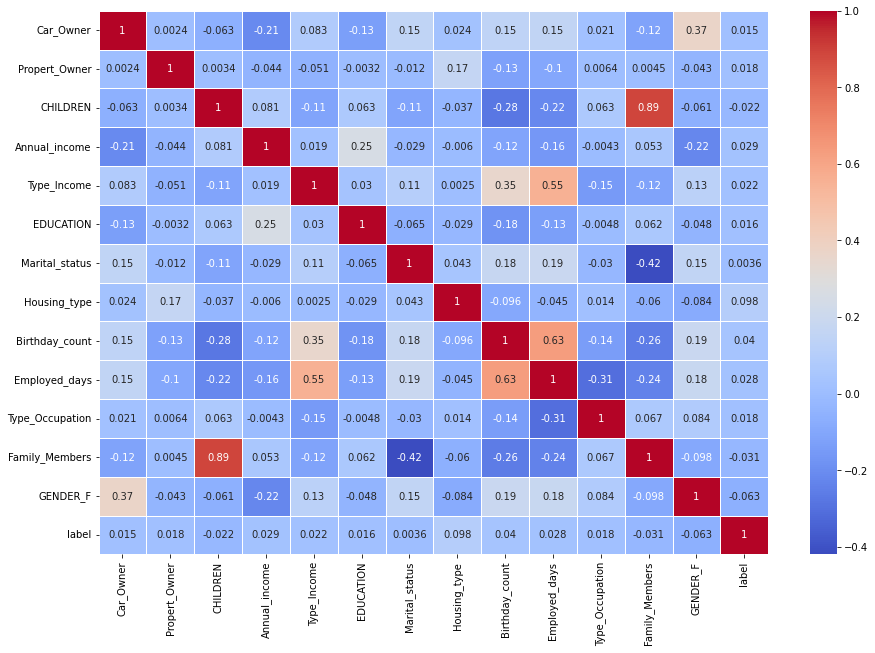

In [ ]:
corr1 =df7_miss.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr1,cmap='coolwarm',linewidths=0.5,annot=True)

In [ ]:
df7_miss.tail()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1543        1.0            0.0       0.0  171441.763709          1.0   
1544        1.0            1.0       0.0  225000.000000          1.0   
1545        0.0            0.0       2.0  180000.000000          0.0   
1546        0.0            1.0       0.0  270000.000000          0.0   
1547        0.0            0.0       0.0  225000.000000          0.0   

      EDUCATION  Marital_status  Housing_type  Birthday_count  Employed_days  \
1543        3.0             0.0           0.0         11957.0         2182.0   
1544        2.0             1.0           0.0         10229.0         1209.0   
1545        3.0             0.0           0.0         13174.0         2477.0   
1546        1.0             2.0           0.0         15292.0          645.0   
1547        3.0             0.0           0.0         16601.0         2859.0   

      Type_Occupation  Family_Members  GENDER_F  label  
1543              2.0             2.0       1.0      0  
1544              7.0             1.0       1.0      0  
1545              2.0             4.0       0.0      0  
1546              4.0             2.0       0.0      0  
1547              0.0             2.0       1.0      0

In [ ]:
# exploring all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(df7_miss)

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
0           0.0            0.0       0.0   1.800000e+05          2.0   
1           0.0            1.0       0.0   3.150000e+05          1.0   
2           0.0            1.0       0.0   3.150000e+05          1.0   
3           0.0            1.0       0.0   3.150000e+05          1.0   
4           0.0            1.0       0.0   3.150000e+05          1.0   
5           0.0            1.0       0.0   3.150000e+05          2.0   
6           0.0            1.0       0.0   3.150000e+05          1.0   
7           1.0            1.0       0.0   1.800000e+05          2.0   
8           0.0            0.0       1.0   4.500000e+05          1.0   
9           0.0            0.0       1.0   4.500000e+05          2.0   
10          0.0            0.0       1.0   4.500000e+05          1.0   
11          0.0            0.0       0.0   9.000000e+04          0.0   
12          0.0            0.0       0.0   9.000000e+04          0.0   
13          0.0            0.0       0.0   9.000000e+04          0.0   
14          1.0            1.0       1.0   4.725000e+05          2.0   
15          1.0            0.0       0.0   2.700000e+05          0.0   
16          1.0            0.0       0.0   2.700000e+05          0.0   
17          1.0            0.0       0.0   1.260000e+05          1.0   
18          1.0            0.0       0.0   1.260000e+05          1.0   
19          1.0            0.0       0.0   9.000000e+04          2.0   
20          1.0            1.0       0.0   2.025000e+05          0.0   
21          0.0            0.0       0.0   2.025000e+05          1.0   
22          1.0            0.0       0.0   1.575000e+05          1.0   
23          1.0            0.0       2.0   1.125000e+05          1.0   
24          1.0            0.0       0.0   1.800000e+05          0.0   
25          0.0            0.0       0.0   5.400000e+05          1.0   
26          1.0            0.0       0.0   1.125000e+05          2.0   
27          1.0            0.0       0.0   1.304999e+05          2.0   
28          1.0            0.0       0.0   2.925000e+05          0.0   
29          1.0            1.0       0.0   5.400000e+05          1.0   
30          1.0            0.0       0.0   9.000000e+04          0.0   
31          1.0            0.0       0.0   1.125000e+05          2.0   
32          1.0            1.0       0.0   1.350000e+05          0.0   
33          0.0            1.0       1.0   1.350000e+05          0.0   
34          1.0            0.0       0.0   1.800000e+05          0.0   
35          0.0            1.0       0.0   1.125000e+05          3.0   
36          0.0            0.0       0.0   2.925000e+05          0.0   
37          0.0            0.0       0.0   7.650000e+04          2.0   
38          0.0            0.0       0.0   2.151000e+05          1.0   
39          0.0            0.0       0.0   4.500000e+05          1.0   
40          0.0            1.0       2.0   2.700000e+05          3.0   
41          1.0            0.0       0.0   2.250000e+05          2.0   
42          1.0            0.0       0.0   2.250000e+05          2.0   
43          1.0            0.0       0.0   2.250000e+05          2.0   
44          1.0            0.0       1.0   1.575000e+05          1.0   
45          1.0            0.0       1.0   1.575000e+05          2.0   
46          1.0            0.0       1.0   6.750000e+04          1.0   
47          0.0            1.0       1.0   1.800000e+05          1.0   
48          0.0            1.0       1.0   1.800000e+05          1.0   
49          1.0            1.0       0.0   1.575000e+05          0.0   
50          1.0            1.0       0.0   1.575000e+05          0.0   
51          1.0            1.0       0.0   1.710000e+05          1.0   
52          0.0            1.0       1.0   1.350000e+05          0.0   
53          0.0            1.0       1.0   1.350000e+05          0.0   
54          1.0            0.0       0.0   1.0

# **DEALING WITH OUTLIERS **

In [ ]:
df7_miss.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   

   Type_Occupation  Family_Members  GENDER_F  label  
0              0.0             2.0       0.0      1  
1              0.0             2.0       1.0      1  
2              0.0             2.0       1.0      1  
3              0.0             2.0       1.0      1  
4              0.0             2.0       1.0      1

In [ ]:
df7_miss.nunique()

Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       137
Type_Income           4
EDUCATION             4
Marital_status        5
Housing_type          6
Birthday_count     1291
Employed_days       956
Type_Occupation      18
Family_Members        7
GENDER_F              2
label                 2
dtype: int64

In [ ]:
df7_miss['CHILDREN'].unique()

array([ 0.,  1.,  2.,  4.,  3., 14.])

In [ ]:
df7_miss['Annual_income'].agg(['min','max','median'])

min         33750.0
max       1575000.0
median     166500.0
Name: Annual_income, dtype: float64

<Axes: xlabel='Annual_income', ylabel='Density'>

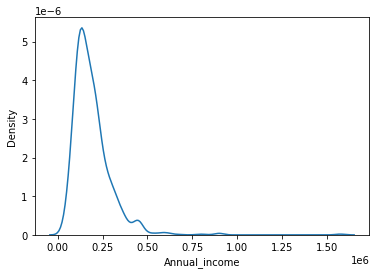

In [ ]:
sns.kdeplot(data =df7_miss,x='Annual_income')



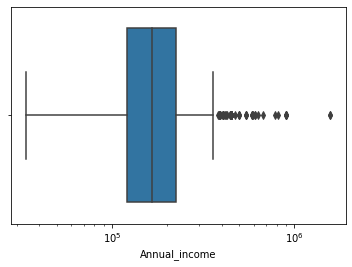

In [ ]:
sns.boxplot(data =df7_miss,x='Annual_income')
plt.xscale('log')

In [ ]:
df7_miss.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   

   Type_Occupation  Family_Members  GENDER_F  label  
0              0.0             2.0       0.0      1  
1              0.0             2.0       1.0      1  
2              0.0             2.0       1.0      1  
3              0.0             2.0       1.0      1  
4              0.0             2.0       1.0      1

In [ ]:
data = pd.DataFrame(df7_miss) # checking correlation only between Annual_income and label
print(data.corr(method = 'spearman'))

                 Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
Car_Owner         1.000000       0.002401 -0.070776      -0.240446   
Propert_Owner     0.002401       1.000000  0.016922      -0.020659   
CHILDREN         -0.070776       0.016922  1.000000       0.066315   
Annual_income    -0.240446      -0.020659  0.066315       1.000000   
Type_Income       0.082990      -0.061072 -0.129562      -0.007062   
EDUCATION        -0.130006       0.001836  0.090962       0.249621   
Marital_status    0.156906      -0.009326 -0.163202      -0.008532   
Housing_type      0.032506       0.210040 -0.024579      -0.020203   
Birthday_count    0.140710      -0.121440 -0.333244      -0.118423   
Employed_days     0.147726      -0.069860 -0.173997      -0.101097   
Type_Occupation  -0.029605       0.019324  0.116644       0.071209   
Family_Members   -0.135321       0.011568  0.814579       0.040550   
GENDER_F          0.371265      -0.042567 -0.065250      -0.279149   
label             0.

In [ ]:
df7_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Owner        1548 non-null   float64
 1   Propert_Owner    1548 non-null   float64
 2   CHILDREN         1548 non-null   float64
 3   Annual_income    1548 non-null   float64
 4   Type_Income      1548 non-null   float64
 5   EDUCATION        1548 non-null   float64
 6   Marital_status   1548 non-null   float64
 7   Housing_type     1548 non-null   float64
 8   Birthday_count   1548 non-null   float64
 9   Employed_days    1548 non-null   float64
 10  Type_Occupation  1548 non-null   float64
 11  Family_Members   1548 non-null   float64
 12  GENDER_F         1548 non-null   float64
 13  label            1548 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 213.7 KB


In [ ]:
df7_miss.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   

   Type_Occupation  Family_Members  GENDER_F  label  
0              0.0             2.0       0.0      1  
1              0.0             2.0       1.0      1  
2              0.0             2.0       1.0      1  
3              0.0             2.0       1.0      1  
4              0.0             2.0       1.0      1

In [ ]:
#--------------------------------------------------------------------------

# Performing Transformation of Data

In [ ]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x = df7_miss.drop(['label'], axis=1)
y = df7_miss['label']

In [ ]:
y = df7_miss['label']

In [ ]:
y =df7_miss['label']

In [ ]:
x.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   

   Type_Occupation  Family_Members  GENDER_F  
0              0.0             2.0       0.0  
1              0.0             2.0       1.0  
2              0.0             2.0       1.0  
3              0.0             2.0       1.0  
4              0.0             2.0       1.0

In [ ]:
x.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   

   Type_Occupation  Family_Members  GENDER_F  
0              0.0             2.0       0.0  
1              0.0             2.0       1.0  
2              0.0             2.0       1.0  
3              0.0             2.0       1.0  
4              0.0             2.0       1.0

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)  

In [ ]:
x_train.shape

(1238, 13)

In [ ]:
x_test.shape

(310, 13)

# RANDOM FOREST CLASSIFIER

In [ ]:
#create the model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf1 = RandomForestClassifier(n_estimators = 100)
rf1.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
prediction_rf = rf1.predict(x_test)

In [ ]:
rf_score = rf1.score(x_test,y_test)*100

In [ ]:
rf_score

94.19354838709677

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,prediction_rf)

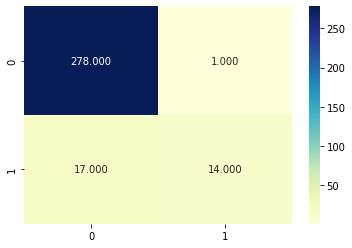

In [ ]:
labels = [0,1]
sns.heatmap(cnf_matrix,annot = True, cmap ="YlGnBu",fmt =".3f",xticklabels = labels, yticklabels =labels)
plt.show()


In [ ]:
prediction_rf =rf1.predict(x)

In [ ]:
cnf_matrix  = confusion_matrix(y,prediction_rf.round())

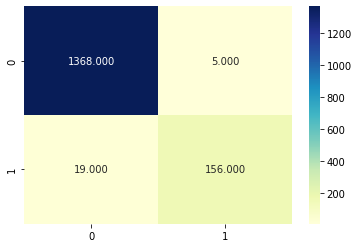

In [ ]:
sns.heatmap(cnf_matrix,annot = True, cmap ="YlGnBu",fmt =".3f",xticklabels = labels, yticklabels =labels)
plt.show()

# Logistic Regression

In [ ]:
df7_miss.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   

   Type_Occupation  Family_Members  GENDER_F  label  
0              0.0             2.0       0.0      1  
1              0.0             2.0       1.0      1  
2              0.0             2.0       1.0      1  
3              0.0             2.0       1.0      1  
4              0.0             2.0       1.0      1

In [ ]:
approved= len(df7_miss[df7_miss.label==0])

In [ ]:
approved

1373

In [ ]:
not_approved = len(df7_miss[df7_miss.label==1])

In [ ]:
not_approved 

175

In [ ]:
not_approved1 = df7_miss[df7_miss.label==1]

In [ ]:
not_approved1

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
0          0.0            0.0       0.0  180000.000000          2.0   
1          0.0            1.0       0.0  315000.000000          1.0   
2          0.0            1.0       0.0  315000.000000          1.0   
3          0.0            1.0       0.0  315000.000000          1.0   
4          0.0            1.0       0.0  315000.000000          1.0   
5          0.0            1.0       0.0  315000.000000          2.0   
6          0.0            1.0       0.0  315000.000000          1.0   
7          1.0            1.0       0.0  180000.000000          2.0   
8          0.0            0.0       1.0  450000.000000          1.0   
9          0.0            0.0       1.0  450000.000000          2.0   
10         0.0            0.0       1.0  450000.000000          1.0   
11         0.0            0.0       0.0   90000.000000          0.0   
12         0.0            0.0       0.0   90000.000267          0.0   
13         0.0            0.0       0.0   90000.000000          0.0   
14         1.0            1.0       1.0  472500.000000          2.0   
15         1.0            0.0       0.0  270000.000000          0.0   
16         1.0            0.0       0.0  270000.000000          0.0   
17         1.0            0.0       0.0  126000.000000          1.0   
18         1.0            0.0       0.0  126000.000000          1.0   
19         1.0            0.0       0.0   90000.000000          2.0   
20         1.0            1.0       0.0  202500.000000          0.0   
21         0.0            0.0       0.0  202500.000000          1.0   
22         1.0            0.0       0.0  157500.000000          1.0   
23         1.0            0.0       2.0  112500.000000          1.0   
24         1.0            0.0       0.0  180000.000000          0.0   
25         0.0            0.0       0.0  540000.000000          1.0   
26         1.0            0.0       0.0  112500.000000          2.0   
27         1.0            0.0       0.0  130499.876251          2.0   
28         1.0            0.0       0.0  292500.000000          0.0   
29         1.0            1.0       0.0  540000.000000          1.0   
30         1.0            0.0       0.0   90000.000000          0.0   
31         1.0            0.0       0.0  112500.000000          2.0   
32         1.0            1.0       0.0  135000.000000          0.0   
33         0.0            1.0       1.0  135000.000000          0.0   
34         1.0            0.0       0.0  180000.000000          0.0   
35         0.0            1.0       0.0  112500.000000          3.0   
36         0.0            0.0       0.0  292500.000000          0.0   
37         0.0            0.0       0.0   76500.000000          2.0   
38         0.0            0.0       0.0  215100.000000          1.0   
39         0.0            0.0       0.0  450000.000000          1.0   
40         0.0            1.0       2.0  270000.000000          3.0   
41         1.0            0.0       0.0  225000.000000          2.0   
42         1.0            0.0       0.0  225000.000000          2.0   
43         1.0            0.0       0.0  225000.000000          2.0   
44         1.0            0.0       1.0  157500.000000          1.0   
45         1.0            0.0       1.0  157500.000000          2.0   
46         1.0            0.0       1.0   67500.000000          1.0   
47         0.0            1.0       1.0  180000.000000          1.0   
48         0.0            1.0       1.0  180000.000000          1.0   
49         1.0            1.0       0.0  157500.000000          0.0   
50         1.0            1.0       0.0  157500.000000          0.0   
51         1.0            1.0       0.0  171000.000000          1.0   
52         0.0            1.0       1.0  135000.000000          0.0   
53         0.0            1.0       1.0  135000.000000          0.0   
54         1.0            0.0       0.0  103500.000000          0.0   
55         1.0            0.0

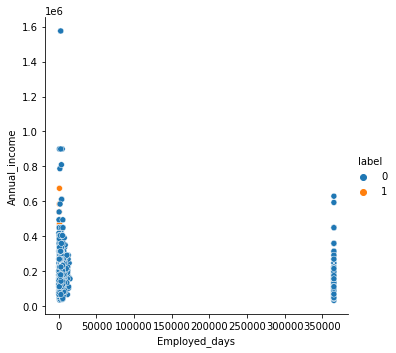

In [ ]:
sns.relplot(x='Employed_days',y='Annual_income',hue='label',data=df7_miss)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
x = df7_miss.iloc[:,:-1]
y = df7_miss['label']

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size=0.35)

In [ ]:
clf = linear_model.LogisticRegression(C=1e5)

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression(C=100000.0)

In [ ]:
y_pred = np.array(clf.predict(X_test))
y = np.array(y_test)

In [ ]:
sklearn.metrics.ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))


[[476   0]
 [ 66   0]]
0.8782287822878229
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       476
           1       0.00      0.00      0.00        66

    accuracy                           0.88       542
   macro avg       0.44      0.50      0.47       542
weighted avg       0.77      0.88      0.82       542



roc_auc_score for Logistic Regression:  0.47961229946524064


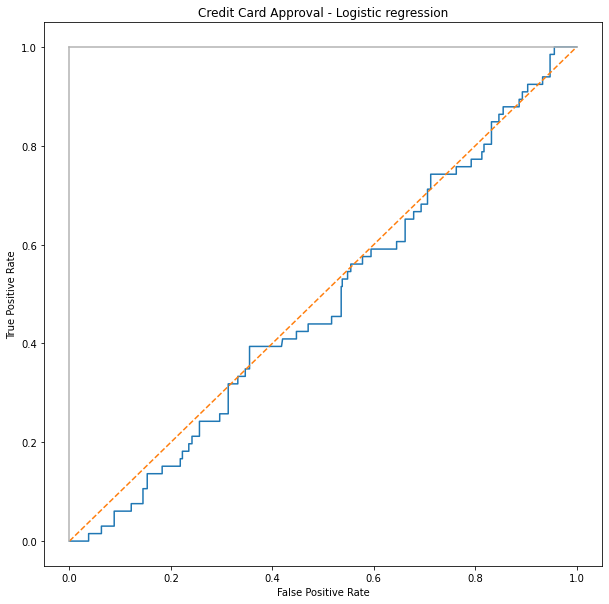

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
sklearn.metrics.roc_curve
sklearn.metrics.roc_auc_score
clf_reg = LogisticRegression();
y_score2 = clf.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
plt.subplots(1, figsize=(10,10))
plt.title('Credit Card Approval - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# K-Nearest Neighbor Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split, KFold

In [ ]:
x = df7_miss.iloc[:,:-1]
y = df7_miss['label']

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
print(models)

[('LR', LogisticRegression()), ('KNN', KNeighborsClassifier())]


In [ ]:
results = dict()
for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model,X_train,y_train, cv=kfold, scoring='accuracy')
  results[name] =(cv_results.mean(), cv_results.std())
print()
print()
print("name    results.mean  results.std")
for key,value in results.items():
  print(key,value)






name    results.mean  results.std
LR (0.8829202727511145, 0.035479713538549215)
KNN (0.8579137162339364, 0.040500105482871605)


# DECISION TREE ALGORITHM

In [ ]:
x = df7_miss.iloc[:,:-1]
y = df7_miss['label']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
my_tree = DecisionTreeClassifier()
my_tree.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred =my_tree.predict(x_test)

In [ ]:
sklearn.metrics.accuracy_score
sklearn.metrics.accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [ ]:
confusion_matrix(y_test,y_pred)

array([[248,  25],
       [ 16,  21]])

In [ ]:
(243+22)/(243+25+20+22)

0.8548387096774194

In [ ]:
#Accuracy score for this Decision_Tree_Model is 85.5%

# Hyperparameter Tuning the model - Inorder the increase the accuracy

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
df7_miss.head()

Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0        0.0            0.0       0.0       180000.0          2.0        3.0   
1        0.0            1.0       0.0       315000.0          1.0        3.0   
2        0.0            1.0       0.0       315000.0          1.0        3.0   
3        0.0            1.0       0.0       315000.0          1.0        3.0   
4        0.0            1.0       0.0       315000.0          1.0        3.0   

   Marital_status  Housing_type  Birthday_count  Employed_days  \
0             0.0           0.0         18772.0       365243.0   
1             0.0           0.0         13557.0          586.0   
2             0.0           0.0         13557.0          586.0   
3             0.0           0.0         13557.0          586.0   
4             0.0           0.0         13557.0          586.0   

   Type_Occupation  Family_Members  GENDER_F  label  
0              0.0             2.0       0.0      1  
1              0.0             2.0       1.0      1  
2              0.0             2.0       1.0      1  
3              0.0             2.0       1.0      1  
4              0.0             2.0       1.0      1

In [ ]:
df7_miss.shape


(1548, 14)

In [ ]:
X = df7_miss.iloc[:,[3,9]]
Y = df7_miss.iloc[:,13]

In [ ]:
X


Annual_income  Employed_days
0      1.800000e+05       365243.0
1      3.150000e+05          586.0
2      3.150000e+05          586.0
3      3.150000e+05          586.0
4      3.150000e+05          586.0
5      3.150000e+05          586.0
6      3.150000e+05          586.0
7      1.800000e+05       365243.0
8      4.500000e+05          678.0
9      4.500000e+05          678.0
10     4.500000e+05          678.0
11     9.000000e+04         1002.0
12     9.000000e+04         1002.0
13     9.000000e+04         1002.0
14     4.725000e+05          913.0
15     2.700000e+05          248.0
16     2.700000e+05          248.0
17     1.260000e+05         2470.0
18     1.260000e+05         2470.0
19     9.000000e+04         1644.0
20     2.025000e+05         4327.0
21     2.025000e+05         1674.0
22     1.575000e+05         1086.0
23     1.125000e+05          925.0
24     1.800000e+05          854.0
25     5.400000e+05          185.0
26     1.125000e+05       365243.0
27     1.304999e+05       365243.0
28     2.925000e+05         3350.0
29     5.400000e+05          691.0
30     9.000000e+04         4770.0
31     1.125000e+05       365243.0
32     1.350000e+05         2394.0
33     1.350000e+05          384.0
34     1.800000e+05         3647.0
35     1.125000e+05         1546.0
36     2.925000e+05          808.0
37     7.650000e+04       365243.0
38     2.151000e+05         1285.0
39     4.500000e+05          855.0
40     2.700000e+05         7369.0
41     2.250000e+05       365243.0
42     2.250000e+05       365243.0
43     2.250000e+05       365243.0
44     1.575000e+05         2269.0
45     1.575000e+05         2269.0
46     6.750000e+04         4114.0
47     1.800000e+05         1161.0
48     1.800000e+05         1161.0
49     1.575000e+05         7288.0
50     1.575000e+05         7288.0
51     1.710000e+05          166.0
52     1.350000e+05          866.0
53     1.350000e+05          866.0
54     1.035000e+05          564.0
55     1.035000e+05          564.0
56     2.250000e+05         3366.0
57     2.250000e+05         3366.0
58     2.250000e+05         3366.0
59     1.800000e+05         2150.0
60     1.575000e+05         1458.0
61     1.575000e+05         1458.0
62     1.800000e+05         8369.0
63     1.800000e+05         8369.0
64     9.900000e+04       365243.0
65     9.900004e+04       365243.0
66     9.900000e+04       365243.0
67     9.900000e+04       365243.0
68     3.915000e+05          508.0
69     3.915000e+05          508.0
70     3.915000e+05          508.0
71     6.525000e+04       365243.0
72     7.290000e+04       365243.0
73     2.250000e+05       365243.0
74     6.750000e+04         1567.0
75     1.800000e+05          137.0
76     1.799978e+05          137.0
77     2.025000e+05         3974.0
78     1.575000e+05         1570.0
79     2.025000e+05         2878.0
80     2.700000e+05          140.0
81     1.350000e+05         2576.0
82     3.600000e+05         1905.0
83     2.565000e+05         1724.0
84     2.565000e+05         1724.0
85     1.575000e+05         1328.0
86     2.250000e+05         4987.0
87     1.800000e+05         3496.0
88     1.800000e+05         3496.0
89     2.025000e+05         1394.0
90     2.025000e+05         1394.0
91     2.025000e+05         1394.0
92     3.150000e+05         1265.0
93     2.250000e+05         2531.0
94     1.260000e+05         2105.0
95     6.750000e+05          860.0
96     1.350000e+05          217.0
97     1.350000e+05          217.0
98     2.475000e+05          535.0
99     1.035000e+05       365243.0
100    8.550000e+04         6866.0
101    1.350000e+05          584.0
102    1.350000e+05          584.0
103    1.800000e+05         2227.0
104    1.215000e+05         8161.0
105    1.800000e+05          613.0
106    2.250000e+05       365243.0
107    2.216703e+05          606.0
108    1.350000e+05         6944.0
109    2.250000e+05          346.0
110    6.750000e+04       365243.0
111    1.350000e+05       365243.0
112    1.305000e+05         1808.0
113    1.305000e

In [ ]:
Y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit(x_test)

In [ ]:
x_train.shape

(1161, 2)

In [ ]:
x_test.shape

(387, 2)

In [ ]:
clf = SVC()

In [ ]:
clf.fit(x_train_scaled,y_train)

SVC()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8888888888888888

In [ ]:
grid = {
    'C':[1,10,100,1000],
    'kernel':['rbf','linear'],
    'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

In [ ]:
grid_search_cv = GridSearchCV(SVC(), param_grid=grid,scoring='accuracy',n_jobs=-1)

In [ ]:
grid_search_cv.fit(x_train_scaled,y_train)

In [ ]:
grid_search_cv.best_score_

# Hence the "RANDOM FOREST CLASSIFIER" IS THE BEST SUITED MODEL FOR THE CREDIT-CARD DATASET, WITH ACCURACY_SCORE OF 93%